### Environment Setup & Library Imports

We begin by importing the core libraries used throughout the project:

- `warnings`: Configured to suppress specific `RuntimeWarning`, `FutureWarning`, and timezone-related warnings, ensuring cleaner notebook output.
- `pandas`: The fundamental library for efficient data manipulation and analysis, crucial for working with DataFrames.
- `numpy`: Provides support for numerical operations, often used in conjunction with `pandas` for mathematical computations.
- `seaborn`: A high-level statistical data visualization library built on `matplotlib`, used to create aesthetically pleasing and informative plots. A 'viridis' color palette is set as default for consistent visualization.
- `matplotlib.pyplot`: The core plotting library providing a comprehensive interface for creating static visualizations.
- `datetime`: Python's built-in module for handling date and time objects, used for various time-based calculations.
- `plotly.express`: A high-level API for generating interactive data visualizations, particularly useful for dynamic funnel charts.
- `operator.attrgetter`: Imported for specific, efficient attribute retrieval, which can be useful in custom sorting or data processing operations.

This initial setup ensures the notebook runs cleanly, has all necessary tools available, and is ready for comprehensive user event analytics.

In [1]:
import warnings
warnings.filterwarnings("ignore", message=".*drop timezone information.*")
warnings.filterwarnings("ignore", category=RuntimeWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

import pandas as pd
import numpy as np
import seaborn as sns
sns.set_palette('viridis')

import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

from operator import attrgetter

### Loading the E-Commerce Dataset

We load the raw user events dataset (`2019-Nov.csv`) containing over 67 million interactions from a multi-category e-commerce platform. The `event_time` column is parsed as datetime for time-based analysis.

Additionally, we configure pandas to display all columns when viewing DataFrame outputs using:
```python

In [2]:
pd.set_option('display.max_columns', None)

df_main = pd.read_csv('/kaggle/input/ecommerce-behavior-data-from-multi-category-store/2019-Nov.csv', parse_dates=["event_time"])

### Sampling 25 Million Rows from the Full Dataset

To simulate realistic large-scale analysis while managing memory effectively, we randomly sample **25 million rows** from the full raw dataset using:


In [3]:
df = df_main.sample(n=25000000, random_state=42).copy()

df.info()
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
Index: 25000000 entries, 48061404 to 8006749
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64              
 8   user_session   object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 1.9+ GB


,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
count,25000000,25000000,2.500000e+07,2.500000e+07,16889254,21582606,2.500000e+07,2.500000e+07,24999996
unique,NaN,3,NaN,NaN,128,4113,NaN,NaN,9103343
top,NaN,view,NaN,NaN,electronics.smartphone,samsung,NaN,NaN,d99d91bf-40f8-4e29-9593-54b4a1826542
freq,NaN,23538668,NaN,NaN,6064550,2920499,NaN,NaN,1543
mean,2019-11-16 00:18:13.149370880+00:00,NaN,1.251871e+07,2.057898e+18,NaN,NaN,2.924464e+02,5.386415e+08,NaN
min,2019-11-01 00:00:00+00:00,NaN,1.000978e+06,2.053014e+18,NaN,NaN,0.000000e+00,2.951588e+07,NaN
25%,2019-11-10 16:46:25+00:00,NaN,1.305977e+06,2.053014e+18,NaN,NaN,6.924000e+01,5.164794e+08,NaN
50%,2019-11-16 05:40:50+00:00,NaN,5.100570e+06,2.053014e+18,NaN,NaN,1.657700e+02,5.350598e+08,NaN
75%,2019-11-20 16:54:10+00:00,NaN,1.730075e+07,2.053014e+18,NaN,NaN,3.603400e+02,5.610772e+08,NaN
max,2019-11-30 23:59:59+00:00,NaN,1.000286e+08,2.187708e+18,NaN,NaN,2.574070e+03,5.799699e+08,NaN


### Initial Data Overview & Quality Check

After loading and sampling the dataset, a crucial first step is to perform an extensive initial data overview. This helps in understanding the dataset's structure, identifying key characteristics, and uncovering potential data quality issues before proceeding with analysis.

This section provides:

- **Temporal Scope Confirmation:** Verification of the exact date range covered by the `event_time` column, confirming the dataset is specifically for November 2019.
- **Scale Assessment:** Counts of the total number of events and unique users within the sampled dataset, providing an understanding of the data's overall magnitude.
- **Event Type Distribution:** A breakdown of how frequently each `event_type` (e.g., 'view', 'cart', 'purchase') occurs, offering immediate insights into general user activity patterns.
- **Dimensionality Check:** Display of the DataFrame's shape (number of rows and columns).
- **Data Type Verification:** A summary of the data type for each column, ensuring that critical columns like `event_time` are correctly parsed as datetime objects for time-series analysis.
- **Missing Values Identification:** A count of null values per column, highlighting any missing data that requires cleaning or imputation strategies.
- **Cardinality Analysis:** The number of unique values for each column, which is essential for understanding the diversity of categorical features and validating identifier columns (like `user_id`, `product_id`).

This comprehensive initial inspection forms the foundation for informed data cleaning and subsequent analytical steps.

In [4]:
print(f"\nEvent time range: {df['event_time'].min()} to {df['event_time'].max()}")

print(f"Number of unique users in sample: {df['user_id'].nunique()}")

print(f"Total events in sample: {len(df)}")

print("\n--- Event Type Value Counts ---")
print(df['event_type'].value_counts())

print("\n--- Rows, Columns ---")
print("Rows, Columns:", df.shape)

print("\n--- Data Types ---")
print(df.dtypes)

print("\n--- Missing Values ---")
print(df.isnull().sum())

print("\n--- Unique Counts ---")
print(df.nunique())


Event time range: 2019-11-01 00:00:00+00:00 to 2019-11-30 23:59:59+00:00
Number of unique users in sample: 2902451
Total events in sample: 25000000

--- Event Type Value Counts ---
event_type
view        23538668
cart         1122136
purchase      339196
Name: count, dtype: int64

--- Rows, Columns ---
Rows, Columns: (25000000, 9)

--- Data Types ---
event_time       datetime64[ns, UTC]
event_type                    object
product_id                     int64
category_id                    int64
category_code                 object
brand                         object
price                        float64
user_id                        int64
user_session                  object
dtype: object

--- Missing Values ---
event_time             0
event_type             0
product_id             0
category_id            0
category_code    8110746
brand            3417394
price                  0
user_id                0
user_session           4
dtype: int64

--- Unique Counts ---
event_time    

### Data Cleaning and Memory Optimization

This phase focuses on refining the dataset by addressing identified data quality issues and significantly enhancing computational efficiency. This is crucial for handling large datasets effectively and ensuring the reliability of subsequent analyses.

Key steps performed include:

-   **Handling Missing Values:**
    * A very small number of rows with missing `user_session` values were explicitly identified and removed, as their impact on the overall dataset (25 million entries) was negligible.
    * For columns with a more substantial amount of missing data (`category_code` and `brand`), `NaN` values were strategically filled with the string 'Unknown'. This approach preserves the integrity of the rows, allowing all events to contribute to the analysis, while explicitly categorizing the missing information.
-   **Zero Price Investigation:**
    * An investigation into `event_time`s where `price` was `0.0` was conducted. It was confirmed that these zero prices were consistently associated with 'view' and 'add\_to\_cart' event types, indicating they are logical and expected data points rather than errors (as these actions do not directly incur a cost).
-   **Memory Optimization:**
    * A significant reduction in the DataFrame's memory footprint (approximately 60%) was achieved. This optimization is vital for improving processing speed and preventing memory-related issues when working with large datasets.
    * **Downcasting Numerical Types:** Integer columns such as `product_id`, `category_id`, and `user_id` were converted to smaller, more memory-efficient integer types (`int32`) where their value range permitted.
    * **Categorical Type Conversion:** String-based 'object' columns with a limited number of unique values (low cardinality), like `event_type`, `category_code`, and `brand`, were converted to Pandas' `category` data type. This highly efficient data type stores unique values once and uses integer codes internally, leading to substantial memory savings.

In [5]:
initial_entries = len(df)
df.dropna(subset=['user_session'], inplace=True)
print(f"\nDropped {initial_entries - len(df)} rows with missing 'user_session'. New number of entries: {len(df)}")

df['category_code'] = df['category_code'].fillna('Unknown')
df['brand'] = df['brand'].fillna('Unknown')

print("\n--- Missing values after cleaning (category_code, brand, user_session) ---")
print(df.isnull().sum())

print("\n--- Event types with price = 0.0 ---")
print(df[df['price'] == 0.0]['event_type'].value_counts())

print("\n--- Memory usage BEFORE optimization (deep) ---")
print(df.info(memory_usage='deep'))

df['product_id'] = pd.to_numeric(df['product_id'], downcast='integer')
df['category_id'] = pd.to_numeric(df['category_id'], downcast='integer')
df['user_id'] = pd.to_numeric(df['user_id'], downcast='integer') 

df['event_type'] = df['event_type'].astype('category')
df['category_code'] = df['category_code'].astype('category')
df['brand'] = df['brand'].astype('category')

print("\n--- Memory usage AFTER optimization (deep) ---")
print(df.info(memory_usage='deep'))


Dropped 4 rows with missing 'user_session'. New number of entries: 24999996

--- Missing values after cleaning (category_code, brand, user_session) ---
event_time       0
event_type       0
product_id       0
category_id      0
category_code    0
brand            0
price            0
user_id          0
user_session     0
dtype: int64

--- Event types with price = 0.0 ---
event_type
view    68372
cart     1642
Name: count, dtype: int64

--- Memory usage BEFORE optimization (deep) ---
<class 'pandas.core.frame.DataFrame'>
Index: 24999996 entries, 48061404 to 8006749
Data columns (total 9 columns):
 #   Column         Dtype              
---  ------         -----              
 0   event_time     datetime64[ns, UTC]
 1   event_type     object             
 2   product_id     int64              
 3   category_id    int64              
 4   category_code  object             
 5   brand          object             
 6   price          float64            
 7   user_id        int64           

### Feature Engineering for Cohort Analysis (Part 1: Date Derivations)

This phase focuses on deriving essential date-based features that are foundational for conducting robust cohort analysis. These features allow us to define user cohorts and track their activity relative to their initial engagement.

Key derivations performed include:

-   **Event Date Normalization:** The `event_time` column, which contains precise timestamps, is floored to the nearest day (`.dt.floor('D')`). This creates a new `event_date` column that represents just the date part (e.g., 2019-11-15 00:00:00), ensuring consistency for date-based comparisons while preserving the `datetime64[ns]` data type critical for Pandas' time-series functionalities.
-   **First Active Date (Cohort Definition):** For each unique user, their `first_active_date` is determined by finding the minimum `event_date` associated with that user. This date serves as the user's "cohort entry point" – the specific day they first became active on the platform. This derived date is then merged back into the main DataFrame, linking every event to its user's unique cohort.
-   **Last Active Date (Recency Basis):** Similarly, for each unique user, their `last_active_date` is calculated by finding the maximum `event_date`. This metric is crucial for the "Recency" component of RFM analysis, as it indicates how recently a user has interacted with the platform. This date is also merged back into the main DataFrame.

These derived date features are critical for segmenting users into cohorts and for calculating key retention and Recency metrics in subsequent analytical steps.

In [6]:
df['event_date'] = df['event_time'].dt.floor('D') 

first_active_date = df.groupby('user_id')['event_date'].min().reset_index()
first_active_date.rename(columns={'event_date': 'first_active_date'}, inplace=True)
print("\n--- Sample of first_active_date ---")
print(first_active_date.head())

if 'first_active_date' in df.columns:
    df.drop('first_active_date', axis=1, inplace=True)

df = pd.merge(df, first_active_date, on='user_id', how='left')
print("\n--- df Head after merging first_active_date ---")
print(df.head())

last_active_date = df.groupby('user_id')['event_date'].max().reset_index()
last_active_date.rename(columns={'event_date': 'last_active_date'}, inplace=True)
print("\n--- Sample of last_active_date ---")
print(last_active_date.head())

if 'last_active_date' in df.columns:
    df.drop('last_active_date', axis=1, inplace=True)

df = pd.merge(df, last_active_date, on='user_id', how='left')
print("\n--- df Head after merging last_active_date ---")
print(df.head())


--- Sample of first_active_date ---
    user_id         first_active_date
0  29515875 2019-11-12 00:00:00+00:00
1  31198833 2019-11-08 00:00:00+00:00
2  42896738 2019-11-12 00:00:00+00:00
3  44378150 2019-11-20 00:00:00+00:00
4  49484535 2019-11-10 00:00:00+00:00

--- df Head after merging first_active_date ---
                 event_time event_type  product_id          category_id  \
0 2019-11-19 08:35:46+00:00       view    30200005  2053013554449088861   
1 2019-11-26 14:16:08+00:00       view     1005115  2053013555631882655   
2 2019-11-10 17:50:50+00:00       view    15700275  2053013559733912211   
3 2019-11-04 14:23:52+00:00       view     1004589  2053013555631882655   
4 2019-11-29 17:11:17+00:00   purchase     5300157  2053013563173241677   

            category_code     brand   price    user_id  \
0                 Unknown     elari   77.20  512412397   
1  electronics.smartphone     apple  916.37  568675496   
2                 Unknown  imperial  206.16  513262731   
3  

### Feature Engineering for Cohort Analysis (Part 2: Period Calculations)

Building upon the derived date features, this phase calculates key metrics essential for tracking user engagement and defining cohort-specific activity periods. These calculations are fundamental for constructing the cohort retention matrix.

Key calculations performed include:

-   **Cohort Day:** The `cohort_day` is extracted as the day of the month from each user's `first_active_date`. This categorizes users by the specific calendar day in November they first became active (e.g., users joining on November 1st are in Cohort Day 1).
-   **Active Days (Lifecycle Progression):** The `active_days` metric represents the number of days elapsed between a user's `first_active_date` and the `event_date` of any given event. A value of 0 means the event occurred on their first day (Day 1 of their lifecycle), 1 means Day 2, and so on. This precisely tracks how many days into their lifecycle an event occurred.
-   **Cohort Period:** For daily retention analysis, the `active_days` directly serves as the `cohort_period`. This standardized term indicates a user's stage within their engagement lifecycle (e.g., `cohort_period = 0` signifies Day 1 activity, `cohort_period = 6` signifies Day 7 activity).

These features are crucial for grouping user activities by their initial join date and observing their behavior over successive days, forming the basis for the retention heatmaps.

In [7]:
df['cohort_day'] = df['first_active_date'].dt.day

df['active_days'] = (df['event_date'] - df['first_active_date']).dt.days

df['cohort_period'] = df['active_days']

print("\n--- df Head with Cohort Features ---")
print(df[['user_id', 'event_time', 'event_date', 'first_active_date', 'cohort_day', 'active_days', 'cohort_period']].head())


--- df Head with Cohort Features ---
     user_id                event_time                event_date  \
0  512412397 2019-11-19 08:35:46+00:00 2019-11-19 00:00:00+00:00   
1  568675496 2019-11-26 14:16:08+00:00 2019-11-26 00:00:00+00:00   
2  513262731 2019-11-10 17:50:50+00:00 2019-11-10 00:00:00+00:00   
3  562973725 2019-11-04 14:23:52+00:00 2019-11-04 00:00:00+00:00   
4  560750791 2019-11-29 17:11:17+00:00 2019-11-29 00:00:00+00:00   

          first_active_date  cohort_day  active_days  cohort_period  
0 2019-11-13 00:00:00+00:00          13            6              6  
1 2019-11-07 00:00:00+00:00           7           19             19  
2 2019-11-05 00:00:00+00:00           5            5              5  
3 2019-11-02 00:00:00+00:00           2            2              2  
4 2019-11-07 00:00:00+00:00           7           22             22  


### Cohort Analysis Calculation

This phase aggregates the meticulously prepared data to construct the core **cohort retention matrix**. This matrix is the numerical foundation for understanding user retention rates across various cohorts and over time.

Key steps involved are:

-   **Aggregating User Counts:** Users are grouped by their `first_active_date` (defining each cohort) and their `cohort_period` (days since their first activity). For each unique combination, the number of distinct `user_id`s is counted. This provides the raw number of users from a specific cohort who were active on a particular day of their lifecycle.
-   **Pivoting for Matrix Format:** The aggregated counts are then transformed into a pivot table. The `first_active_date` becomes the index (rows), representing each daily cohort. The `cohort_period` forms the columns (representing days into the user's lifecycle: Day 1, Day 2, etc.). The values within the table are the `num_users` active in that specific cohort and period.
-   **Calculating Cohort Sizes:** The initial size of each cohort (the total number of users who joined on a specific `first_active_date`) is extracted. This is crucial as it serves as the baseline for calculating retention percentages.
-   **Computing Retention Percentages:** Each cell in the raw cohort pivot table is divided by its corresponding `cohort_size` (the initial number of users in that cohort). The result is then multiplied by 100 to express retention as a percentage. This `retention_matrix` clearly shows the percentage of users from each cohort who remained active in subsequent days.

This matrix is then used for visual analysis, revealing patterns of user stickiness and drop-off over time.

In [8]:
cohort_counts = df.groupby(['first_active_date', 'cohort_period'])['user_id'].nunique().reset_index()
cohort_counts.rename(columns={'user_id': 'num_users'}, inplace=True)

print("\n--- Sample of Cohort Counts ---")
print(cohort_counts.head())

cohort_pivot = cohort_counts.pivot_table(
    index='first_active_date',
    columns='cohort_period',
    values='num_users'
)

print("\n--- Cohort Pivot Table (Raw Counts) ---")
print(cohort_pivot.head())

cohort_sizes = cohort_pivot.iloc[:, 0]
print("\n--- Cohort Sizes (Number of users joined each day) ---")
print(cohort_sizes.head())

retention_matrix = cohort_pivot.divide(cohort_sizes, axis=0) * 100

print("\n--- Retention Matrix (Percentage) ---")
print(retention_matrix.head(10))


--- Sample of Cohort Counts ---
          first_active_date  cohort_period  num_users
0 2019-11-01 00:00:00+00:00              0     160004
1 2019-11-01 00:00:00+00:00              1      26360
2 2019-11-01 00:00:00+00:00              2      21515
3 2019-11-01 00:00:00+00:00              3      22681
4 2019-11-01 00:00:00+00:00              4      20236

--- Cohort Pivot Table (Raw Counts) ---
cohort_period                    0        1        2        3        4   \
first_active_date                                                         
2019-11-01 00:00:00+00:00  160004.0  26360.0  21515.0  22681.0  20236.0   
2019-11-02 00:00:00+00:00  142185.0  19547.0  16883.0  14731.0  13999.0   
2019-11-03 00:00:00+00:00  131863.0  17172.0  13512.0  12128.0  11997.0   
2019-11-04 00:00:00+00:00  142626.0  17277.0  14175.0  13203.0  12233.0   
2019-11-05 00:00:00+00:00  123545.0  13803.0  11474.0  10024.0   9074.0   

cohort_period                   5        6        7        8        9   \
fi

### Cohort Analysis Visualization (Full Heatmap)

This section creates a detailed visual representation of the daily user retention using a heatmap. This powerful visualization makes complex retention patterns immediately understandable.

Key aspects of this visualization include:

-   **Heatmap Generation:** A `seaborn.heatmap` is used to plot the `retention_matrix`, where each cell's color intensity represents the retention rate (percentage) for a specific cohort on a particular day of their lifecycle.
-   **Annotations:** The exact retention percentage is displayed within each cell, providing precise numerical context alongside the visual gradient.
-   **Color Mapping:** A 'YlGnBu' (Yellow-Green-Blue) colormap is applied, where darker shades of blue typically indicate higher retention rates, making it easy to identify areas of better user stickiness.
-   **Readability Enhancements:**
    * `linewidths` and `linecolor` are used to add thin borders between cells, improving visual separation and clarity.
    * The plot is given a descriptive title, and axis labels are clearly defined for ease of interpretation.
    * `plt.yticks(rotation=0)` ensures that the date labels on the Y-axis are displayed horizontally, enhancing readability.
    * `plt.tight_layout()` automatically adjusts plot parameters for a tight layout, preventing elements from overlapping.
-   **Saving the Plot:** The generated heatmap is saved as a PNG image (`cohort_heatmap_full.png`) to be included in the project's documentation (e.g., GitHub `README.md`), making it accessible for review outside the notebook.

This heatmap serves as a cornerstone for understanding the overall daily retention performance and identifying key periods of user drop-off.

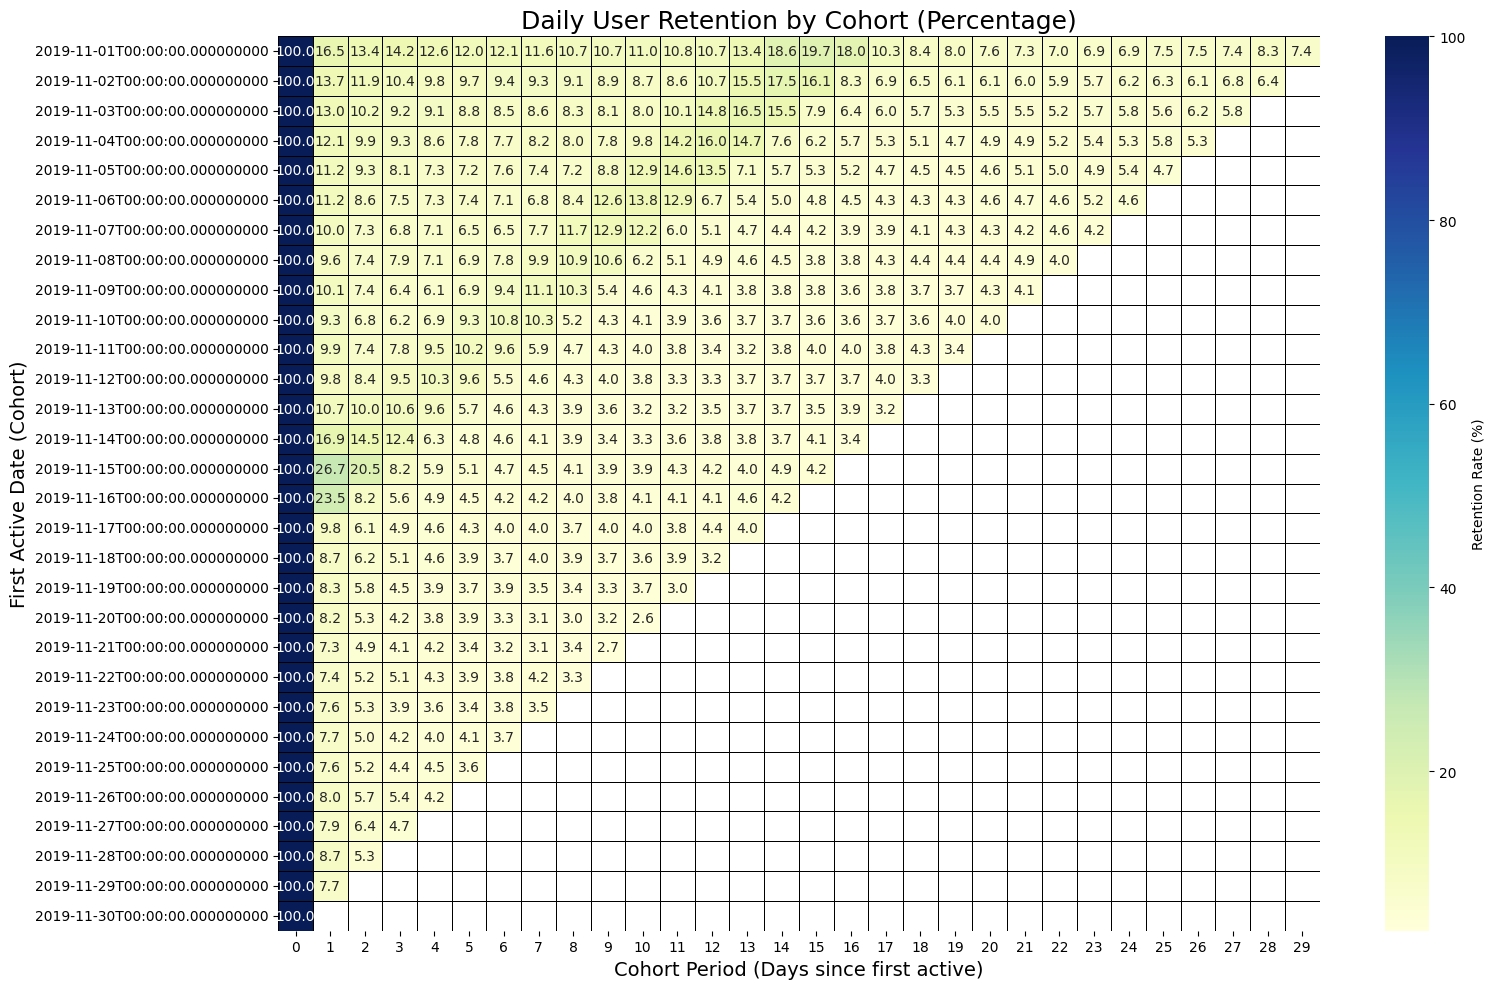

In [9]:
plt.figure(figsize=(16, 10))
sns.heatmap(
    retention_matrix,
    annot=True,      
    fmt=".1f",       
    cmap="YlGnBu",   
    linewidths=.5,   
    linecolor='black',
    cbar_kws={'label': 'Retention Rate (%)'} 
)
plt.title('Daily User Retention by Cohort (Percentage)', fontsize=18)
plt.xlabel('Cohort Period (Days since first active)', fontsize=14)
plt.ylabel('First Active Date (Cohort)', fontsize=14)
plt.yticks(rotation=0) 
plt.tight_layout() 
plt.savefig('cohort_heatmap_full.png') 
plt.show()

### Cohort Analysis Visualization (Key Milestones Heatmap)

This section refines the cohort analysis by focusing specifically on retention rates at crucial milestones: Day 1, Day 2, Day 7, and Day 30. This targeted visualization provides a quick and impactful summary of short-term and mid-term user stickiness.

Key aspects of this visualization include:

-   **Targeted Data Selection:** Only the `cohort_period`s corresponding to Day 1 (Period 0), Day 2 (Period 1), Day 7 (Period 6), and Day 30 (Period 29) are selected from the full `retention_matrix`. This creates a focused subset for specific insights.
-   **Clear Labeling:** Column headers are renamed to intuitive labels like 'Day 1 (Period 0)' to enhance interpretability for any audience.
-   **Heatmap Visualization:** A `seaborn.heatmap` is again used, similar to the full retention heatmap, to visually represent these key retention percentages. The color intensity helps quickly identify cohorts with better or worse performance at these critical stages.
-   **Readability & Presentation:**
    * The plot is sized appropriately for fewer columns.
    * Annotations, formatting, colormap, and line styles are consistently applied for clear visual communication.
    * A descriptive title and axis labels ensure the plot's purpose is immediately understood.
-   **Saving the Plot:** The generated heatmap is saved as a PNG image (`key_retention_heatmap.png`) for inclusion in project documentation.
-   **Average Retention Summary:** The average retention rates for these key days are calculated and printed. This provides a single, summarized metric for overall short-term and mid-term retention performance across all cohorts for which data is available, ignoring periods where data is incomplete (due to the one-month dataset limitation).

This focused heatmap and its accompanying average statistics are vital for quickly communicating the most impactful retention insights and challenges.

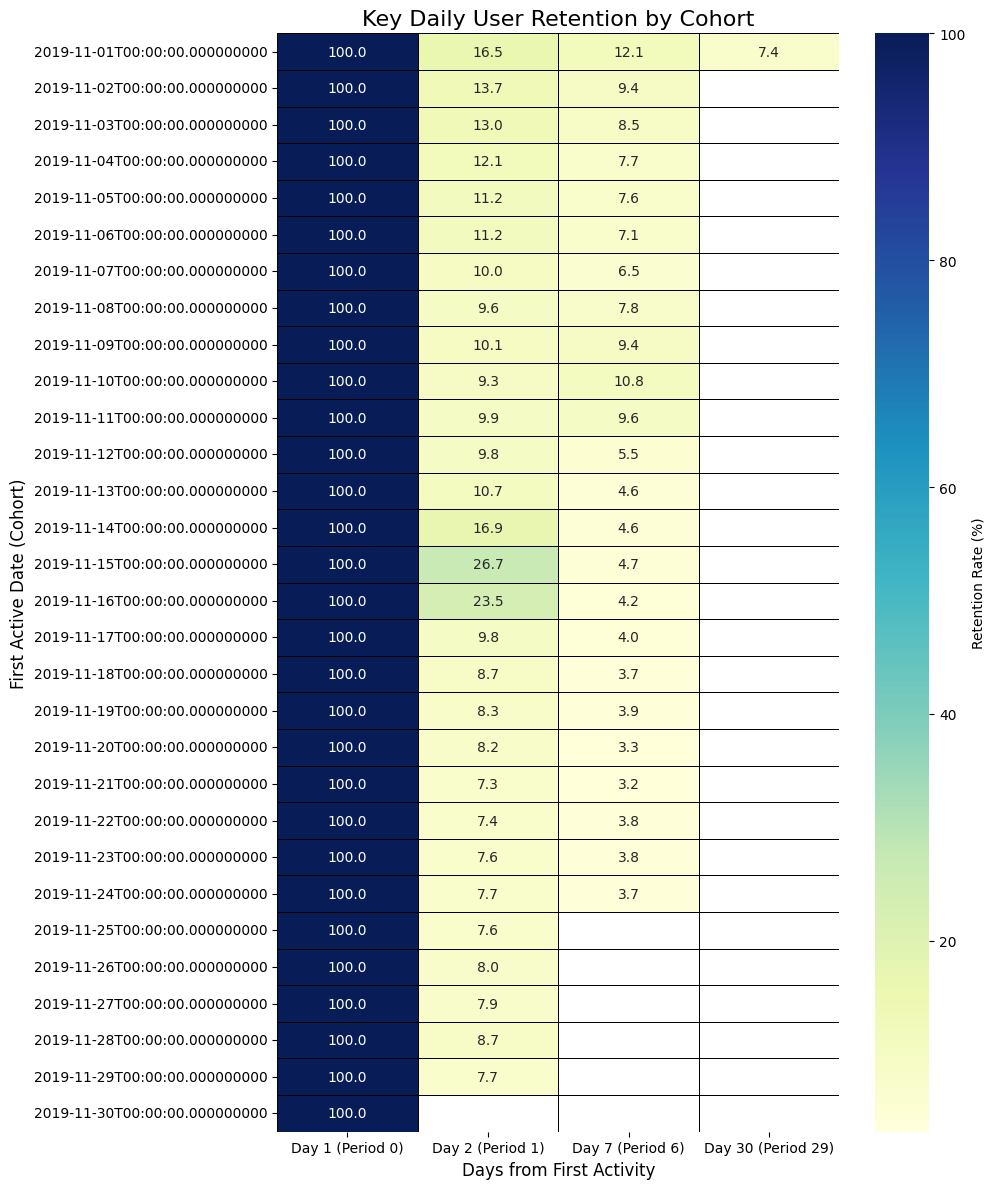


--- Average Retention Rates for Key Days (across available cohorts) ---
Day 1 (Period 0)      100.00
Day 2 (Period 1)       11.00
Day 7 (Period 6)        6.23
Day 30 (Period 29)      7.42
dtype: float64


In [10]:
key_retention_days = [0, 1, 6, 29] 
key_retention_matrix = retention_matrix[key_retention_days].copy()

key_retention_matrix.columns = ['Day 1 (Period 0)', 'Day 2 (Period 1)', 'Day 7 (Period 6)', 'Day 30 (Period 29)']

plt.figure(figsize=(10, 12)) 
sns.heatmap(
    key_retention_matrix,
    annot=True,
    fmt=".1f",
    cmap="YlGnBu",
    linewidths=.5,
    linecolor='black',
    cbar_kws={'label': 'Retention Rate (%)'}
)
plt.title('Key Daily User Retention by Cohort', fontsize=16)
plt.xlabel('Days from First Activity', fontsize=12)
plt.ylabel('First Active Date (Cohort)', fontsize=12)
plt.yticks(rotation=0)
plt.tight_layout()
plt.savefig('key_retention_heatmap.png')
plt.show()

print("\n--- Average Retention Rates for Key Days (across available cohorts) ---")
print(key_retention_matrix.mean(axis=0, skipna=True).round(2))

### RFM Calculation (Core Metrics)

This section marks the beginning of the Recency, Frequency, and Monetary (RFM) analysis, a powerful customer segmentation technique. The goal here is to compute the three core RFM metrics for each unique user in the dataset.

Key steps involved are:

-   **Defining Snapshot Date:** A `snapshot_date` is established as the day immediately following the last event recorded in the dataset. This fixed point in time is crucial for accurately calculating "Recency," as it defines how recently a user's last activity occurred relative to the end of our observation period.
-   **Aggregating RFM Metrics per User:**
    * **Recency:** For each `user_id`, this metric calculates the number of days between the `snapshot_date` and the user's latest recorded `event_time`. A lower Recency value indicates more recent activity, signifying a more engaged user.
    * **Frequency:** This metric counts the total number of events (interactions) for each user. It provides a measure of overall engagement on the platform, encompassing various activities like views, cart additions, and purchases.
    * **Monetary:** This metric sums the `price` of all 'purchase' events for each user. This provides an accurate reflection of the actual monetary value a user has contributed. For users with no purchase events, their Monetary value is correctly assigned as `0`.
-   **Handling Zero Monetary Values:** Users who did not make any purchases will naturally have `NaN` as their Monetary value after aggregation. These `NaN`s are explicitly filled with `0` to ensure consistency and proper representation in the RFM DataFrame.
-   **Initial RFM Data Review:** The resulting `rfm_df` is inspected by displaying a sample of its rows (`.head()`), its structural information (`.info()`, including data types and non-null counts), and descriptive statistics (`.describe()`). This review helps to validate the calculated metrics and understand their distributions.

> This phase lays the foundation for understanding individual customer value and behavior, leading into the creation of customer segments.

In [11]:
snapshot_date = df['event_time'].max().normalize() + pd.Timedelta(days=1)
print(f"\nSnapshot Date for RFM: {snapshot_date}")

rfm_df = df.groupby('user_id').agg(
    Recency=('event_time', lambda date: (snapshot_date - date.max()).days),
    Frequency=('user_id', 'count'),
    Monetary=('price', lambda x: x[df.loc[x.index, 'event_type'] == 'purchase'].sum()) 
).reset_index()

rfm_df['Monetary'] = rfm_df['Monetary'].fillna(0)

print("\n--- Sample of RFM DataFrame ---")
print(rfm_df.head())
print("\n--- RFM DataFrame Info ---")
print(rfm_df.info())
print("\n--- RFM DataFrame Describe ---")
print(rfm_df.describe())


Snapshot Date for RFM: 2019-12-01 00:00:00+00:00

--- Sample of RFM DataFrame ---
    user_id  Recency  Frequency  Monetary
0  29515875       18          3       0.0
1  31198833       11         12       0.0
2  42896738       18          2       0.0
3  44378150       10          1       0.0
4  49484535        0          5       0.0

--- RFM DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2902451 entries, 0 to 2902450
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   user_id    int32  
 1   Recency    int64  
 2   Frequency  int64  
 3   Monetary   float64
dtypes: float64(1), int32(1), int64(2)
memory usage: 77.5 MB
None

--- RFM DataFrame Describe ---
            user_id       Recency     Frequency      Monetary
count  2.902451e+06  2.902451e+06  2.902451e+06  2.902451e+06
mean   5.461036e+08  1.181325e+01  8.613408e+00  3.511707e+01
std    2.414941e+07  8.246157e+00  1.870067e+01  2.802568e+02
min    2.951588e+07  0.000000e+00  

### RFM Calculation (Adding Purchase-Specific Frequency)

This section refines the Frequency metric in the RFM model by specifically focusing on the number of *purchase* events per user. This provides a more precise measure of actual buying behavior, distinct from overall engagement (total events).

Key steps in this refinement are:

-   **Isolating Purchase Events:** The original DataFrame is filtered to create a new DataFrame (`df_purchases`) containing only rows where the `event_type` is 'purchase'. This ensures that only buying activities are considered for this metric.
-   **Calculating Purchase Frequency:** For each unique user within the `df_purchases` DataFrame, the total number of purchase events (`.size()`) is counted. This result is then reset into a DataFrame, creating the `Frequency_Purchases` column.
-   **Merging into RFM DataFrame:** The newly calculated `Frequency_Purchases` is merged into the existing `rfm_df` based on `user_id`. A `left` merge ensures that all users from `rfm_df` (including those who made no purchases) are retained.
-   **Handling Non-Purchasers:** For users who did not make any purchases (and thus do not appear in `df_purchases`), their `Frequency_Purchases` value would be `NaN` after the merge. These `NaN` values are explicitly filled with `0`, correctly indicating zero purchase frequency.
-   **Data Type Conversion:** The `Frequency_Purchases` column is converted to an integer type for consistency and efficiency, as it represents a count.

This enhanced `Frequency_Purchases` metric provides a more nuanced understanding of a user's transactional activity, which is crucial for building more accurate and actionable customer segments.

In [12]:
df_purchases = df[df['event_type'] == 'purchase'].copy()
purchase_frequency = df_purchases.groupby('user_id').size().reset_index(name='Frequency_Purchases')

rfm_df = pd.merge(rfm_df, purchase_frequency, on='user_id', how='left').fillna(0)
rfm_df['Frequency_Purchases'] = rfm_df['Frequency_Purchases'].astype(int)

print("\n--- RFM DataFrame after adding Frequency_Purchases ---")
print(rfm_df.head())
print("\n--- Frequency_Purchases Distribution ---")
print(rfm_df['Frequency_Purchases'].value_counts().sort_index().head(10))


--- RFM DataFrame after adding Frequency_Purchases ---
    user_id  Recency  Frequency  Monetary  Frequency_Purchases
0  29515875       18          3       0.0                    0
1  31198833       11         12       0.0                    0
2  42896738       18          2       0.0                    0
3  44378150       10          1       0.0                    0
4  49484535        0          5       0.0                    0

--- Frequency_Purchases Distribution ---
Frequency_Purchases
0    2679554
1     167276
2      33821
3      10507
4       4513
5       2306
6       1310
7        886
8        559
9        384
Name: count, dtype: int64


### RFM Scoring (Assigning R, F, M Scores)

This crucial phase transforms the raw Recency, Frequency, and Monetary metrics into standardized scores, typically on a scale of 1 to 5. This scoring allows for easier comparison and combination of the metrics to form distinct customer segments.

The scoring process includes:

-   **Recency Score (R_Score):** Users are divided into 5 equal groups (quintiles) based on their `Recency` values. A reverse scoring mechanism is applied: users with the *lowest* Recency (most recent activity) receive the highest score (5), indicating better engagement. The scores are converted to integers.
-   **Frequency Score (F_Score):** This score is based on `Frequency_Purchases` (number of actual purchase events). To accurately reflect buying behavior and handle the large number of non-purchasing users (who have 0 purchases), a specific approach is used:
    * Only users with a positive `Frequency_Purchases` are considered for quantile scoring.
    * These purchasing users are ranked based on their purchase frequency, and then divided into 5 quintiles. Higher frequency earns a higher score (1-5).
    * The resulting scores are merged back into the main RFM DataFrame. Users who made no purchases are explicitly assigned an `F_Score` of `0`. The scores are converted to integers.
-   **Monetary Score (M_Score):** Similar to Frequency, this score is based on `Monetary` value. To address the significant number of users with zero monetary contribution, a similar approach is taken:
    * Only users with a positive `Monetary` value are considered for quantile scoring.
    * These purchasing users are divided into 5 quintiles based on their spending, with higher spending earning a higher score (1-5).
    * The scores are merged back, and non-purchasing users are explicitly assigned an `M_Score` of `0`. The scores are converted to integers.

After scoring, the first few rows of the updated `rfm_df` are displayed to verify the new score columns. The distribution of scores for R, F, and M is printed, clearly showing the large proportion of users with a `0` score for purchasing-related metrics (F_Score, M_Score). Finally, the data types of the RFM DataFrame are checked to ensure all scores are correctly stored as integers.

In [13]:
rfm_df['R_Score'] = pd.qcut(rfm_df['Recency'], 5, labels=[5, 4, 3, 2, 1]).astype(int)

purchasing_users_freq = rfm_df[rfm_df['Frequency_Purchases'] > 0].copy()
purchasing_users_freq['F_Score'] = pd.qcut(purchasing_users_freq['Frequency_Purchases'].rank(method='first'), 5, labels=False) + 1

if 'F_Score' in rfm_df.columns:
    rfm_df.drop('F_Score', axis=1, inplace=True)
rfm_df = pd.merge(rfm_df, purchasing_users_freq[['user_id', 'F_Score']], on='user_id', how='left')
rfm_df['F_Score'].fillna(0, inplace=True) 
rfm_df['F_Score'] = rfm_df['F_Score'].astype(int)

purchasing_users_monetary = rfm_df[rfm_df['Monetary'] > 0].copy()
purchasing_users_monetary['M_Score'] = pd.qcut(purchasing_users_monetary['Monetary'], 5, labels=False) + 1

if 'M_Score' in rfm_df.columns:
    rfm_df.drop('M_Score', axis=1, inplace=True)
rfm_df = pd.merge(rfm_df, purchasing_users_monetary[['user_id', 'M_Score']], on='user_id', how='left')
rfm_df['M_Score'].fillna(0, inplace=True) 
rfm_df['M_Score'] = rfm_df['M_Score'].astype(int)

print("\n--- Sample of RFM DataFrame with Scores ---")
print(rfm_df.head())
print("\n--- Distribution of RFM Scores ---")
print("R_Score Value Counts:\n", rfm_df['R_Score'].value_counts().sort_index())
print("F_Score Value Counts:\n", rfm_df['F_Score'].value_counts().sort_index())
print("M_Score Value Counts:\n", rfm_df['M_Score'].value_counts().sort_index())

print("\n--- RFM DataFrame Dtypes after Scoring ---")
print(rfm_df.dtypes)


--- Sample of RFM DataFrame with Scores ---
    user_id  Recency  Frequency  Monetary  Frequency_Purchases  R_Score  \
0  29515875       18          3       0.0                    0        2   
1  31198833       11         12       0.0                    0        3   
2  42896738       18          2       0.0                    0        2   
3  44378150       10          1       0.0                    0        3   
4  49484535        0          5       0.0                    0        5   

   F_Score  M_Score  
0        0        0  
1        0        0  
2        0        0  
3        0        0  
4        0        0  

--- Distribution of RFM Scores ---
R_Score Value Counts:
 R_Score
1    532249
2    481605
3    646762
4    629891
5    611944
Name: count, dtype: int64
F_Score Value Counts:
 F_Score
0    2679554
1      44580
2      44579
3      44579
4      44579
5      44580
Name: count, dtype: int64
M_Score Value Counts:
 M_Score
0    2679554
1      44586
2      44573
3      44586
4

### RFM Segmentation (Categorizing Users)

This phase combines the individual Recency, Frequency (purchases), and Monetary scores into a single RFM score and then applies a custom logic to categorize users into actionable business segments. This allows for tailored marketing and product strategies based on customer value and behavior.

The process involves:

-   **Combined RFM Score:** The individual `R_Score`, `F_Score`, and `M_Score` are concatenated into a single string (e.g., '555' for a top-tier customer, '120' for a customer with low Recency, moderate Frequency, and no Monetary value). This combined score provides a unique identifier for specific RFM combinations.
-   **Custom Segmentation Logic:** A Python function (`rfm_segment_final`) is defined with a series of conditional rules. These rules hierarchically assign each user to a specific segment based on their RFM scores. The order of these conditions is crucial, typically prioritizing the most valuable or distinct segments first.
    -   **Non-Purchaser:** This segment is identified first, capturing all users with a `M_Score` of `0` (no purchases made).
    -   **Top Tiers:** Segments like 'Champions' (highest R, F, M), 'Loyal Customers' (good Recency, high Purchase Frequency), and 'Top Spenders' (good Recency, high Monetary value) are defined to capture the most valuable customers.
    -   **Mid Tiers:** 'Promising New' identifies customers with recent activity and some purchasing behavior, showing potential for growth.
    -   **At-Risk Tiers:** Segments such as 'High Value, At Risk' (customers who were valuable but are becoming less recent) and 'Engaged Buyers' (still somewhat recent and active purchasers) are defined to pinpoint users who need proactive engagement.
    -   **Low Value / Lapsed Tiers:** 'Lapsed Low-Value' (customers who made a single, low-value purchase and are now inactive) and 'Churned Purchasers' (users who bought but are now completely inactive) represent customers who may require different re-engagement strategies or may be considered lost.
    -   **Other Segment:** A catch-all for any remaining users whose RFM score combinations do not fit the explicitly defined segments.
-   **Segment Assignment:** The custom segmentation function is applied row-wise to the DataFrame, creating a new 'Segment' column for each user.
-   **Segment Distribution Analysis:** The count of users in each segment is displayed, providing a clear overview of the size and proportion of each customer group.
-   **Segment Validation (Mean RFM Values):** The average Recency, Frequency (total events), Purchase Frequency, and Monetary values are calculated for each segment. This step is critical for validating that the defined segments genuinely reflect the intended behavioral characteristics and value profiles.

This segmentation process transforms raw RFM scores into actionable customer groups, enabling tailored marketing and product initiatives.

In [14]:
rfm_df['RFM_Score'] = rfm_df['R_Score'].astype(str) + \
                      rfm_df['F_Score'].astype(str) + \
                      rfm_df['M_Score'].astype(str)

print("\n--- Sample of RFM DataFrame with RFM_Score ---")
print(rfm_df.head())

def rfm_segment(df):
    if df['M_Score'] == 0:
        return 'Non-Purchaser'
         
    if df['R_Score'] == 5 and df['F_Score'] == 5 and df['M_Score'] == 5:
        return 'Champions'

    elif df['R_Score'] >= 4 and df['F_Score'] >= 4: 
        return 'Loyal Customers'

    elif df['R_Score'] >= 4 and df['M_Score'] >= 4: 
        return 'Top Spenders'

    elif df['R_Score'] >= 3 and df['F_Score'] >= 2 and df['M_Score'] >= 2:
        return 'Promising New'

    elif df['R_Score'] <= 2 and (df['F_Score'] >= 3 or df['M_Score'] >= 3): 
        return 'High Value, At Risk'

    elif df['R_Score'] >= 2 and df['F_Score'] >= 2: 
        return 'Engaged Buyers' 

    elif df['R_Score'] <= 2 and df['F_Score'] <= 1 and df['M_Score'] <= 1: 
        return 'Lapsed Low-Value' 

    elif df['R_Score'] <= 1:
        return 'Churned Purchasers' 

    else:
        return 'Other Segment'

rfm_df['Segment'] = rfm_df.apply(rfm_segment, axis=1)

print("\n--- Sample of RFM DataFrame with Segment ---")
print(rfm_df.head())

print("\n--- Distribution of RFM Segments ---")
print(rfm_df['Segment'].value_counts())

print("\n--- Mean RFM values by Segment ---")
print(rfm_df.groupby('Segment')[['Recency', 'Frequency', 'Frequency_Purchases', 'Monetary']].mean())


--- Sample of RFM DataFrame with RFM_Score ---
    user_id  Recency  Frequency  Monetary  Frequency_Purchases  R_Score  \
0  29515875       18          3       0.0                    0        2   
1  31198833       11         12       0.0                    0        3   
2  42896738       18          2       0.0                    0        2   
3  44378150       10          1       0.0                    0        3   
4  49484535        0          5       0.0                    0        5   

   F_Score  M_Score RFM_Score  
0        0        0       200  
1        0        0       300  
2        0        0       200  
3        0        0       300  
4        0        0       500  

--- Sample of RFM DataFrame with Segment ---
    user_id  Recency  Frequency  Monetary  Frequency_Purchases  R_Score  \
0  29515875       18          3       0.0                    0        2   
1  31198833       11         12       0.0                    0        3   
2  42896738       18          2       

### RFM Segment Distribution Visualization

This section visualizes the distribution of users across the defined RFM segments and quantifies their proportions. This provides an immediate and clear understanding of the composition of the customer base, highlighting the relative sizes of each segment.

The visualization includes:

-   **Bar Chart Generation:** A `seaborn.countplot` is used to create a horizontal bar chart. Each bar represents an RFM segment, and its length corresponds to the number of users within that segment.
-   **Ordering:** Segments are ordered by their size (from largest to smallest) for easy comparison and to highlight the most dominant customer groups.
-   **Visual Clarity:** A 'viridis' color palette is applied for aesthetic appeal, and the plot includes a descriptive title and clear axis labels (`xlabel` for 'Number of Users' and `ylabel` for 'Segment'). `plt.tight_layout()` ensures optimal spacing for elements.
-   **Saving the Plot:** The generated chart is saved as a PNG image (`rfm_segment_distribution.png`) for inclusion in the project's documentation (e.g., GitHub `README.md`).
-   **Percentage Distribution:** The exact percentage of users falling into each RFM segment is calculated and printed. This provides a precise quantitative breakdown, complementing the visual representation and underscoring the proportion of key customer groups (e.g., the large 'Non-Purchaser' segment).

This visualization and its accompanying percentage breakdown are crucial for quickly grasping the overall customer landscape and prioritizing strategies for different user segments.

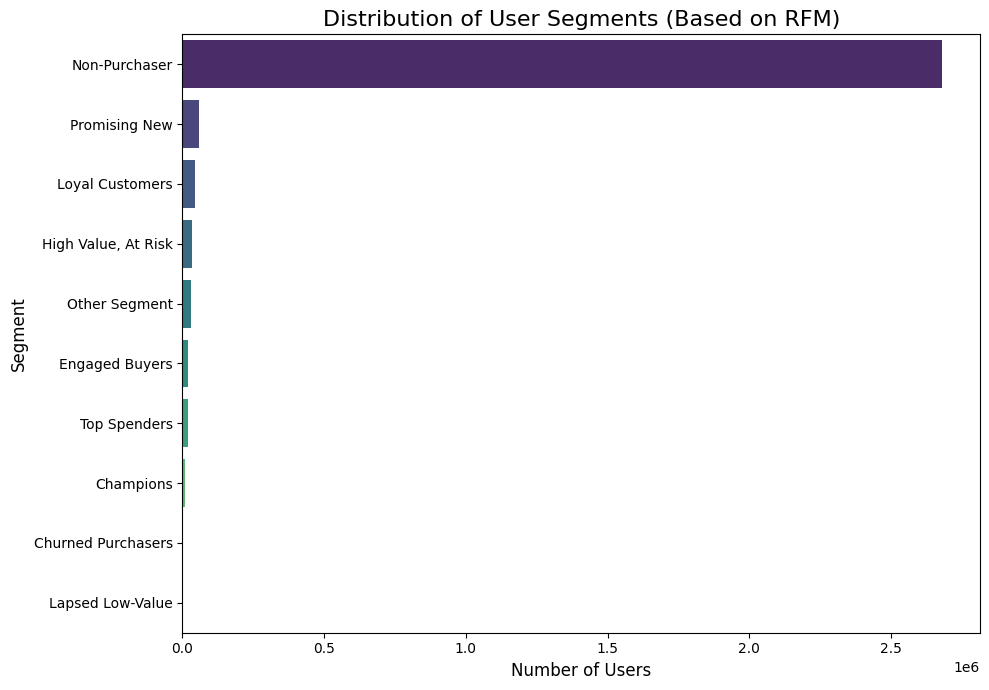


--- Percentage Distribution of RFM Segments ---
Segment
Non-Purchaser          92.32
Promising New           2.02
Loyal Customers         1.54
High Value, At Risk     1.18
Other Segment           1.09
Engaged Buyers          0.73
Top Spenders            0.62
Champions               0.32
Churned Purchasers      0.12
Lapsed Low-Value        0.07
Name: proportion, dtype: float64


In [15]:
plt.figure(figsize=(10, 7))
sns.countplot(data=rfm_df, y='Segment', order=rfm_df['Segment'].value_counts().index, palette='viridis')
plt.title('Distribution of User Segments (Based on RFM)', fontsize=16)
plt.xlabel('Number of Users', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.tight_layout()
plt.savefig('rfm_segment_distribution.png')
plt.show()

segment_distribution = rfm_df['Segment'].value_counts(normalize=True) * 100
print("\n--- Percentage Distribution of RFM Segments ---")
print(segment_distribution.round(2))

### Churn Rate Analysis by Segment (Quantification)

This section quantifies the churn rate within each of the defined RFM segments, providing precise, actionable insights into which customer groups are most susceptible to churn. This analysis directly links user behavior segments to their churn likelihood.

The process involves:

-   **Defining Churn Threshold:** A `churn_threshold_days` is set (e.g., 7 days). A user is considered 'churned' if their `Recency` (days since last activity) exceeds this threshold, implying a period of inactivity. This threshold is typically determined based on product usage patterns and business definitions of churn.
-   **Creating Churn Flag:** A new binary column, `is_churned`, is added to the RFM DataFrame. It is set to `1` for users identified as churned (Recency > threshold) and `0` otherwise.
-   **Calculating Segment Churn Rates:** The DataFrame is grouped by the 'Segment' column, and the mean of the `is_churned` flag is calculated for each group. Since `is_churned` is a binary (0/1) variable, its mean directly represents the proportion (or rate) of churned users within that segment. The results are then converted to percentages and sorted in descending order to highlight the most vulnerable segments.
-   **Displaying Results:** A sample of the DataFrame with the new `is_churned` flag is printed to show its application. The calculated churn rates (in percentage) for each segment are then displayed, providing a clear quantitative overview of churn risk across the customer base.

This quantification of churn by segment is crucial for prioritizing churn prevention and re-engagement strategies for the most at-risk and valuable customer groups.

In [16]:
churn_threshold_days = 7

rfm_df['is_churned'] = (rfm_df['Recency'] > churn_threshold_days).astype(int)

print(f"\n--- Sample of RFM DataFrame with 'is_churned' flag (threshold > {churn_threshold_days} days) ---")
print(rfm_df[['user_id', 'Recency', 'is_churned', 'Segment']].head(10))

segment_churn_rates = rfm_df.groupby('Segment')['is_churned'].mean().sort_values(ascending=False)

print(f"\n--- Churn Rate (%) by Segment (based on > {churn_threshold_days} days inactivity) ---")

print((segment_churn_rates * 100).round(2))


--- Sample of RFM DataFrame with 'is_churned' flag (threshold > 7 days) ---
    user_id  Recency  is_churned        Segment
0  29515875       18           1  Non-Purchaser
1  31198833       11           1  Non-Purchaser
2  42896738       18           1  Non-Purchaser
3  44378150       10           1  Non-Purchaser
4  49484535        0           0  Non-Purchaser
5  50383810       20           1  Non-Purchaser
6  62336140       21           1  Non-Purchaser
7  63518127        5           0  Non-Purchaser
8  66082846        6           0  Non-Purchaser
9  74383042       11           1  Non-Purchaser

--- Churn Rate (%) by Segment (based on > 7 days inactivity) ---
Segment
Churned Purchasers     100.00
High Value, At Risk    100.00
Lapsed Low-Value       100.00
Promising New           72.97
Non-Purchaser           65.11
Engaged Buyers          53.11
Other Segment           50.56
Loyal Customers         14.40
Top Spenders            13.47
Champions                0.00
Name: is_churned, dty

### Churn Rate Analysis by Segment (Visualization)

This section provides a clear and impactful visualization of the churn rates for each RFM segment, complementing the quantitative analysis. This visual representation quickly highlights which customer groups are most affected by churn and thus require immediate attention.

The visualization includes:

-   **Bar Plot Generation:** A `seaborn.barplot` is used to create a horizontal bar chart. Each bar represents an RFM segment, and its length directly corresponds to the calculated churn rate (in percentage) for that segment.
-   **Ordering and Coloring:** The segments are ordered from highest to lowest churn rate, making it easy to identify the most problematic groups. A 'coolwarm' color palette is often used here, allowing for a visual gradient that can intuitively differentiate higher (warmer colors) from lower (cooler colors) churn rates.
-   **Readability Enhancements:**
    * The plot is given a descriptive title that includes the defined churn threshold (e.g., '> 7 days Inactivity').
    * Axis labels (`xlabel` for 'Churn Rate (%)' and `ylabel` for 'Segment') are clearly defined.
    * The X-axis limit is set from 0 to 100% to ensure the full range of churn rates is represented, providing accurate visual comparison.
    * `plt.tight_layout()` adjusts plot parameters to prevent elements from overlapping.
-   **Saving the Plot:** The generated bar chart is saved as a PNG image (`churn_rate_by_segment.png`) for inclusion in the project's documentation (e.g., GitHub `README.md`).

This visualization is a powerful tool for communicating the churn insights to stakeholders, enabling them to prioritize resources for customer retention and win-back campaigns effectively.

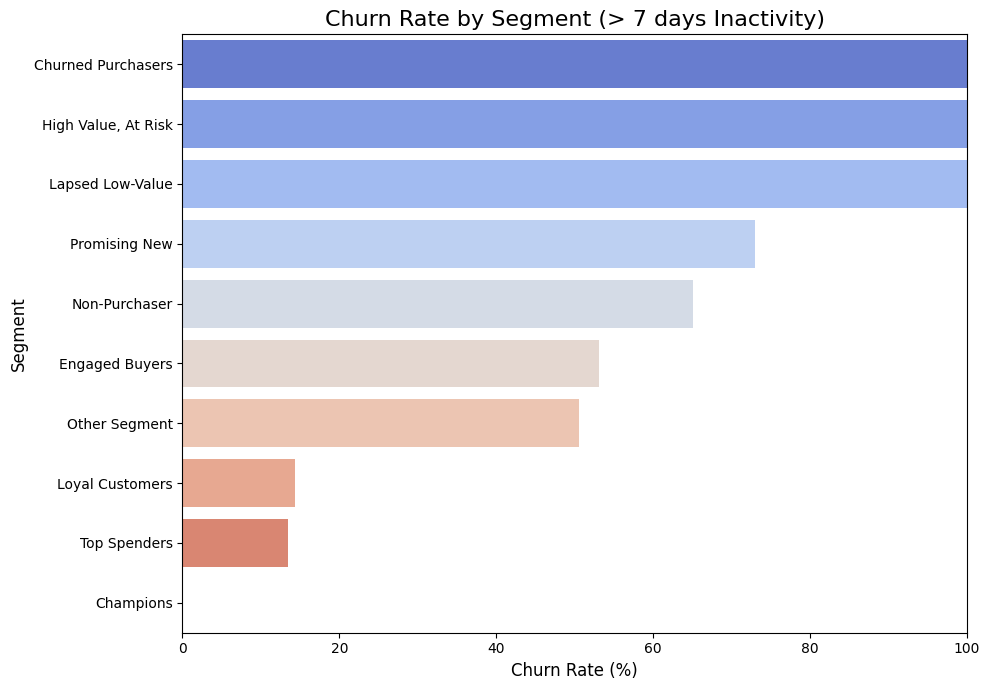

In [17]:
plt.figure(figsize=(10, 7))
sns.barplot(x=(segment_churn_rates * 100).values, y=(segment_churn_rates * 100).index, palette='coolwarm')
plt.title(f'Churn Rate by Segment (> {churn_threshold_days} days Inactivity)', fontsize=16)
plt.xlabel('Churn Rate (%)', fontsize=12)
plt.ylabel('Segment', fontsize=12)
plt.xlim(0, 100) 
plt.tight_layout()
plt.savefig('churn_rate_by_segment.png')
plt.show()

### Funnel Conversion Analysis: User Acquisition to Week 4 Retention

This section presents a high-level funnel analysis, providing an aggregated view of user drop-off from initial acquisition through key weekly milestones. It clearly illustrates the overall user retention performance across all users acquired during the observed month.

Instead of back-calculating, our funnel accurately tracks the actual number of users at each stage:

-   **Users Acquired (Nov)**: This is the definitive count of all unique users whose first recorded activity occurred within November. It represents the absolute total user base acquired during this period, derived by summing the initial sizes of all daily cohorts (`cohort_pivot[0].sum()`).
-   **Active on Day 7**: The total number of users (across all cohorts) who were still active on the 7th day of their lifecycle.
-   **Active on Day 14**: The total number of users who remained active on the 14th day of their lifecycle.
-   **Active on Day 21**: The total number of users active on the 21st day of their lifecycle.
-   **Active on Day 28**: The total number of users active on the 28th day of their lifecycle. *(Note: A 'Week 5 Active' stage is not included as the dataset only covers one month (November), making it impossible to track users for 35 days post-acquisition.)*

We build a simple DataFrame (`funnel_df`) to capture the number of users at each stage, along with their cumulative retention rate relative to the initial users acquired:

| Stage                 | Description                                                        |
| :-------------------- | :----------------------------------------------------------------- |
| Users Acquired (Nov)  | Total unique users whose first activity was in November            |
| Active on Day 7       | Total users active on the 7th day of their lifecycle               |
| Active on Day 14      | Total users active on the 14th day of their lifecycle              |
| Active on Day 21      | Total users active on the 21st day of their lifecycle              |
| Active on Day 28      | Total users active on the 28th day of their lifecycle              |

The resulting CSV (`user_funnel.csv`) and the interactive Plotly visualizations provide a clear and impactful view of user drop-off, highlighting the critical stages where engagement is lost.

In [18]:
total_users_acquired = cohort_pivot[0].sum()

week_1_active = cohort_pivot[6].sum(skipna=True) if 6 in cohort_pivot.columns else 0

week_2_active = cohort_pivot[13].sum(skipna=True) if 13 in cohort_pivot.columns else 0

week_3_active = cohort_pivot[20].sum(skipna=True) if 20 in cohort_pivot.columns else 0

week_4_active = cohort_pivot[27].sum(skipna=True) if 27 in cohort_pivot.columns else 0


funnel_df = pd.DataFrame({
    'Stage': ['Users Acquired (Nov)', 'Active on Day 7', 'Active on Day 14', 'Active on Day 21', 'Active on Day 28'],
    'User_Count': [total_users_acquired, week_1_active, week_2_active, week_3_active, week_4_active]
})

print("\n--- User Funnel DataFrame (Raw Counts) ---")
print(funnel_df)

funnel_df['Retention_Rate (%)'] = (funnel_df['User_Count'] / funnel_df['User_Count'].iloc[0] * 100).round(2)

print("\n--- User Funnel with Retention Rates ---")
print(funnel_df)

funnel_df.to_csv('user_funnel.csv', index=False)
print("\n'user_funnel.csv' saved successfully.")


--- User Funnel DataFrame (Raw Counts) ---
                  Stage  User_Count
0  Users Acquired (Nov)   2902451.0
1       Active on Day 7    169081.0
2      Active on Day 14    150051.0
3      Active on Day 21     64812.0
4      Active on Day 28     29116.0

--- User Funnel with Retention Rates ---
                  Stage  User_Count  Retention_Rate (%)
0  Users Acquired (Nov)   2902451.0              100.00
1       Active on Day 7    169081.0                5.83
2      Active on Day 14    150051.0                5.17
3      Active on Day 21     64812.0                2.23
4      Active on Day 28     29116.0                1.00

'user_funnel.csv' saved successfully.


### Funnel Conversion Visualization

This section focuses on visualizing the user drop-off funnel, transforming the raw counts and retention rates into clear, interactive charts. These visualizations are highly effective for quickly grasping user attrition patterns.

Two types of funnel charts are generated:

-   **Raw User Count Funnel:**
    * An interactive funnel chart is created using Plotly Express, mapping funnel `Stage` to the Y-axis and `User_Count` to the X-axis (determining the width of each segment).
    * The exact `User_Count` is displayed as text on each bar, providing precise numbers at a glance.
    * The chart is oriented horizontally for better readability, especially with longer stage names.
    * Customizations ensure text labels are placed outside the bars, and clear axis titles are provided. The chart is also saved as a static PNG image (`plotly_funnel_raw_counts.png`) for documentation purposes.

-   **Funnel with Percentages:**
    * A second interactive funnel chart is generated, similar to the first, but with a key enhancement: the text displayed on each bar is the `Retention_Rate (%)` for that stage, rather than just the raw user count.
    * This version provides an immediate visual representation of the percentage drop-off at each step, making the overall funnel conversion rates strikingly clear. This chart is also saved as a static PNG image (`plotly_funnel_with_percentages.png`).

These interactive funnel visualizations are powerful tools for communicating the overall user retention challenges and highlighting the most significant points of attrition in the user journey. They complement the detailed cohort analysis by providing a high-level, aggregated view of user behavior.

In [22]:
fig = px.funnel(
    funnel_df,
    y='Stage',         
    x='User_Count',     
    title='User Drop-off Funnel (Weekly Retention)',
    text='User_Count',  
    orientation='h'     
)

fig.update_traces(textposition='outside')
fig.update_layout(
    xaxis_title="Number of Users",
    yaxis_title="Funnel Stage",
    title_x=0.5, 
    hovermode="y unified" 
)

fig_pct = px.funnel(
    funnel_df,
    y='Stage',
    x='User_Count',
    title='User Drop-off Funnel (Weekly Retention) with Percentages',
    text=funnel_df['Retention_Rate (%)'].astype(str) + '%', 
    orientation='h'
)
fig_pct.update_traces(textposition='outside')
fig_pct.update_layout(xaxis_title="Number of Users", yaxis_title="Funnel Stage", title_x=0.5, hovermode="y unified")
fig_pct.show()